## The NumPy Array

In [1]:
import numpy as np

In [2]:
a = np.array([1, 2, 3])
a + a

array([2, 4, 6])

In [3]:
def print_array_details(a):
    print('Dimensions: %d, shape: %s, dtype: %s'%(a.ndim, a.shape, a.dtype))

In [4]:
a = np.array([1, 2, 3, 4, 5, 6, 7, 8])

In [5]:
print_array_details(a)

Dimensions: 1, shape: (8,), dtype: int32


In [6]:
a = a.reshape([2, 4])
a

array([[1, 2, 3, 4],
       [5, 6, 7, 8]])

In [7]:
print_array_details(a)

Dimensions: 2, shape: (2, 4), dtype: int32


In [8]:
a = a.reshape([2, 2, 2])
a

array([[[1, 2],
        [3, 4]],

       [[5, 6],
        [7, 8]]])

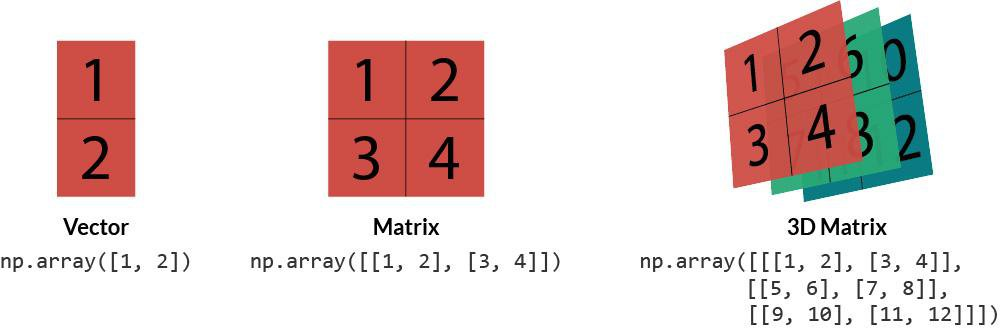

In [9]:
print_array_details(a)

Dimensions: 3, shape: (2, 2, 2), dtype: int32


In [10]:
x = np.array([[1, 2, 3], [4, 5, 6]], np.int32)
x.shape

(2, 3)

In [11]:
x.shape = (6,)
x

array([1, 2, 3, 4, 5, 6])

In [12]:
x = x.astype('int64')
x.dtype

dtype('int64')

## Creating Arrays

In [13]:
a = np.zeros([2,3])
a

array([[0., 0., 0.],
       [0., 0., 0.]])

In [14]:
a.dtype

dtype('float64')

In [15]:
np.ones([2, 3])

array([[1., 1., 1.],
       [1., 1., 1.]])

In [16]:
empty_array = np.empty((2,3))
empty_array

array([[1., 1., 1.],
       [1., 1., 1.]])

In [18]:
empty_array.dtype

dtype('float64')

In [17]:
np.random.random((2,3))

array([[0.30689267, 0.603082  , 0.7216775 ],
       [0.00433839, 0.75375139, 0.49259755]])

In [19]:
np.linspace(2, 10, 5) # 5 numbers in range 2-10

array([ 2.,  4.,  6.,  8., 10.])

In [20]:
np.arange(2, 10, 2)

array([2, 4, 6, 8])

## Array Indexing and Slicing

In [21]:
a = np.array([1, 2, 3, 4, 5, 6])
a[2]

3

In [22]:
a[3:5]

array([4, 5])

In [23]:
# every second item from 0-4 set to 0
a[:4:2] = 0
a

array([0, 2, 0, 4, 5, 6])

In [24]:
a[::-1]

array([6, 5, 4, 0, 2, 0])

In [25]:
# use of full selection (:) and ellipsis
a = np.arange(8)
a.shape = (2, 2, 2)
a
#a[...,0] == a[:,:,0]

array([[[0, 1],
        [2, 3]],

       [[4, 5],
        [6, 7]]])

In [28]:
a1 = a[1].copy()
a1

array([[4, 5],
       [6, 7]])

In [29]:
a2 = a[1,:].copy()
a2

array([[4, 5],
       [6, 7]])

In [30]:
a3 = a[1,:,:].copy()
a3

array([[4, 5],
       [6, 7]])

In [31]:
a[1,...]

array([[4, 5],
       [6, 7]])

In [32]:
# a quick test of equality - the array_equal method compares by shape and elements
np.array_equal(a1, a2)

True

In [33]:
np.array_equal(a1, a3)

True

In [34]:
np.array_equal(a1, a[1,:])

True

In [35]:
a[...,0]

array([[0, 2],
       [4, 6]])

In [36]:
np.array_equal(a[...,0], a[:,:,0])

True

In [37]:
a[...,0].shape

(2, 2)

In [42]:
a[...,[0]]

array([[[0],
        [2]],

       [[4],
        [6]]])

## A Few Basic Operations

In [43]:
a = np.array([45, 65, 76, 32, 99, 22])
a < 50

array([ True, False, False,  True, False,  True])

In [44]:
# Some array methods
a = np.arange(8).reshape((2,4))

a

array([[0, 1, 2, 3],
       [4, 5, 6, 7]])

In [45]:
a.min(axis=1)

array([0, 4])

In [46]:
a.sum(axis=0)

# axis=0 gives same numbers of elements as in axis=0, i.e., in a row (here 4)

array([ 4,  6,  8, 10])

In [48]:
a.sum(axis=1)

# axis=1 gives same numbers of elements as in axis=1, i.e., in a column (here 2)

array([ 6, 22])

In [49]:
a.mean(axis=1)

array([1.5, 5.5])

In [50]:
a.std(axis=1)

array([1.11803399, 1.11803399])

In [51]:
# Trigonometric functions
pi = np.pi
a = np.array([pi, pi/2, pi/4, pi/6])
np.degrees(a) # radians to degrees

array([180.,  90.,  45.,  30.])

In [52]:
sin_a = np.sin(a)
sin_a

array([1.22464680e-16, 1.00000000e+00, 7.07106781e-01, 5.00000000e-01])

In [53]:
np.round(sin_a, 7) # round to 7 decimal places

array([0.       , 1.       , 0.7071068, 0.5      ])

In [54]:
# Sums, products, differences
a = np.arange(8).reshape((2,4))
a

array([[0, 1, 2, 3],
       [4, 5, 6, 7]])

In [55]:
np.cumsum(a, axis=1) # cumulative sum along second axis

array([[ 0,  1,  3,  6],
       [ 4,  9, 15, 22]])

In [56]:
np.cumsum(a) # without axis argument, array is flattened

array([ 0,  1,  3,  6, 10, 15, 21, 28])

# Creating Array Functions

## Calculating a Moving Average

In [57]:
# Calculate a moving average with window size n
def moving_average(a, n=3):
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n

In [58]:
a = np.arange(6)
a

array([0, 1, 2, 3, 4, 5])

In [59]:
csum = np.cumsum(a)
csum

array([ 0,  1,  3,  6, 10, 15])

In [60]:
csum[3:] = csum[3:] - csum[:-3]
csum

array([ 0,  1,  3,  6,  9, 12])

In [61]:
a = np.arange(10)
a

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [62]:
moving_average(a, 4)

array([1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5])